<a href="https://colab.research.google.com/github/vshalisko/GEE/blob/main/Colab/ESE_open_save_numpy_geotiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import ee
#import geemap
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from osgeo import gdal, osr

Conección con GEE (opcional)

In [ ]:
# Trigger the authentication flow.
#ee.Authenticate()

# Initialize the library.
#ee.Initialize(project='ee-viacheslavs')

Coneccion con Google Drive para almacenar archivos

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Leer archivos con datos numpy array

In [3]:
# Save the arrays as .npy files
prediction_2015 = np.load('/content/drive/MyDrive/Colab Data/ESE_2015_prediction_class.npy')
prediction_2020 = np.load('/content/drive/MyDrive/Colab Data/ESE_2020_prediction_class.npy')
prediction_2010 = np.load('/content/drive/MyDrive/Colab Data/ESE_2010_prediction_class.npy')
prediction_2000 = np.load('/content/drive/MyDrive/Colab Data/ESE_2000_prediction_class.npy')

prediction_float_2015 = np.load('/content/drive/MyDrive/Colab Data/ESE_2015_prediction_urbano_float.npy')
prediction_float_2020 = np.load('/content/drive/MyDrive/Colab Data/ESE_2020_prediction_urbano_float.npy')
prediction_float_2010 = np.load('/content/drive/MyDrive/Colab Data/ESE_2010_prediction_urbano_float.npy')
prediction_float_2000 = np.load('/content/drive/MyDrive/Colab Data/ESE_2000_prediction_urbano_float.npy')

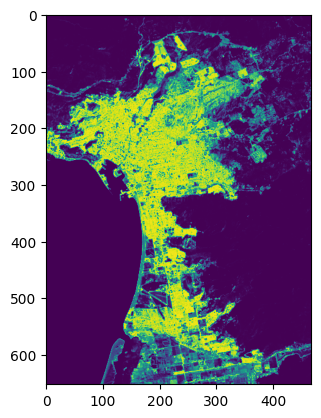

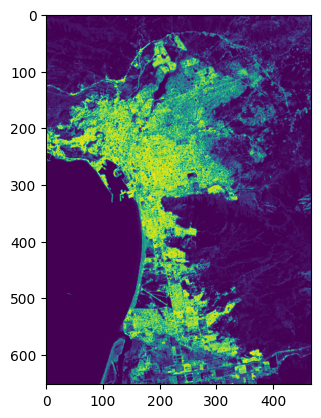

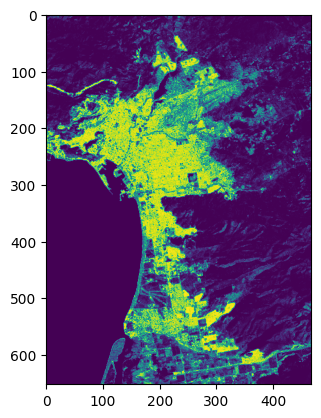

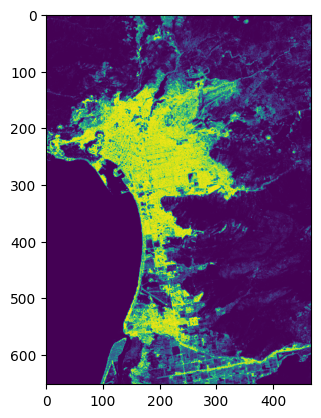

In [4]:
B_img_pred_2015 = (prediction_float_2015).astype('float')
plt.imshow(B_img_pred_2015[:,:])
plt.show()

B_img_pred_2020 = (prediction_float_2020).astype('float')
plt.imshow(B_img_pred_2020[:,:])
plt.show()

B_img_pred_2010 = (prediction_float_2010).astype('float')
plt.imshow(B_img_pred_2010[:,:])
plt.show()

B_img_pred_2000 = (prediction_float_2000).astype('float')
plt.imshow(B_img_pred_2000[:,:])
plt.show()

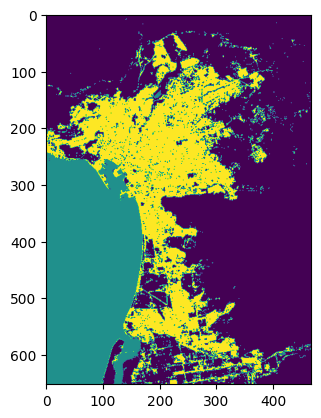

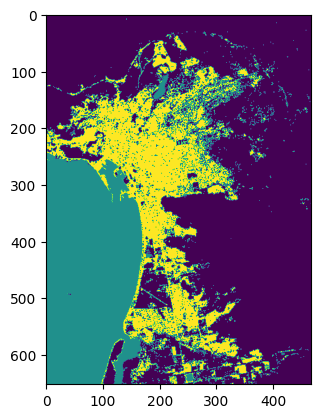

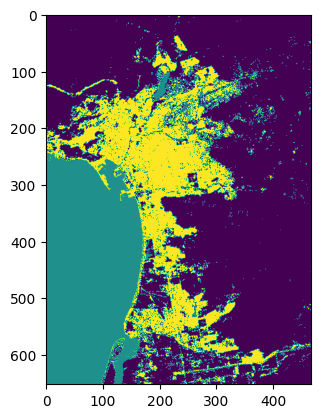

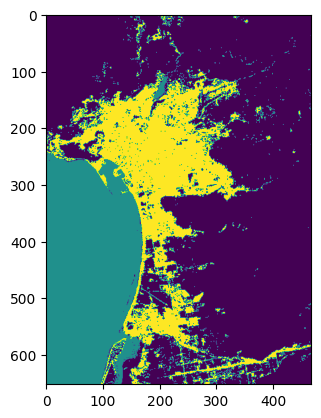

In [6]:
prediction_2015_n = np.reshape(prediction_2015[:], (prediction_float_2015.shape[0], prediction_float_2015.shape[1]))
prediction_2020_n = np.reshape(prediction_2020[:], (prediction_float_2015.shape[0], prediction_float_2015.shape[1]))
prediction_2010_n = np.reshape(prediction_2010[:], (prediction_float_2015.shape[0], prediction_float_2015.shape[1]))
prediction_2000_n = np.reshape(prediction_2000[:], (prediction_float_2015.shape[0], prediction_float_2015.shape[1]))

B_img_pred_c_2015 = (prediction_2015_n).astype('int')
plt.imshow(B_img_pred_c_2015[:,:])
plt.show()

B_img_pred_c_2020 = (prediction_2020_n).astype('int')
plt.imshow(B_img_pred_c_2020[:,:])
plt.show()

B_img_pred_c_2010 = (prediction_2010_n).astype('int')
plt.imshow(B_img_pred_c_2010[:,:])
plt.show()

B_img_pred_c_2000 = (prediction_2000_n).astype('int')
plt.imshow(B_img_pred_c_2000[:,:])
plt.show()

Preparar los parametros de georefferenciación y definir funcion de exportar GeoTIFF

In [7]:
limites_utm = [531951, 547066, 3513217, 3532728]
pixel = 30

# create Spatial Reference (projection)
sr = osr.SpatialReference()
sr.ImportFromEPSG(32611)

## adfGeoTransform[0] /* top left x */
## adfGeoTransform[1] /* w-e pixel resolution */
## adfGeoTransform[2] /* rotation, 0 if image is "north up" */
## adfGeoTransform[3] /* top left y */
## adfGeoTransform[4] /* rotation, 0 if image is
## adfGeoTransform[5] /* n-s pixel resolution */

geotrans = [limites_utm[0], pixel, 0, limites_utm[3], 0, -pixel]

print(geotrans)
#print(sr)
print(sr.ExportToWkt())

def write_geotiff(arr, filename, proj, transform):
    if arr.dtype == np.float32:
        arr_type = gdal.GDT_Float32
    else:
        arr_type = gdal.GDT_Int32
    driver = gdal.GetDriverByName("GTiff")
    out_ds = driver.Create(filename, arr.shape[1], arr.shape[0], 1, arr_type)
    out_ds.SetProjection(proj)
    out_ds.SetGeoTransform(transform)
    band = out_ds.GetRasterBand(1)
    band.WriteArray(arr)
    band.FlushCache()
    band.ComputeStatistics(False)



[531951, 30, 0, 3532728, 0, -30]
PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


Guardar los GeoTIFF

In [8]:
write_geotiff(prediction_float_2015, filename='/content/drive/MyDrive/Colab Data/ESE_2015_prediction_float.tif', proj=sr.ExportToWkt(), transform=geotrans)
write_geotiff(prediction_float_2020, filename='/content/drive/MyDrive/Colab Data/ESE_2020_prediction_float.tif', proj=sr.ExportToWkt(), transform=geotrans)
write_geotiff(prediction_float_2010, filename='/content/drive/MyDrive/Colab Data/ESE_2010_prediction_float.tif', proj=sr.ExportToWkt(), transform=geotrans)
write_geotiff(prediction_float_2000, filename='/content/drive/MyDrive/Colab Data/ESE_2000_prediction_float.tif', proj=sr.ExportToWkt(), transform=geotrans)

write_geotiff(prediction_2015_n, filename='/content/drive/MyDrive/Colab Data/ESE_2015_prediction.tif', proj=sr.ExportToWkt(), transform=geotrans)
write_geotiff(prediction_2020_n, filename='/content/drive/MyDrive/Colab Data/ESE_2020_prediction.tif', proj=sr.ExportToWkt(), transform=geotrans)
write_geotiff(prediction_2010_n, filename='/content/drive/MyDrive/Colab Data/ESE_2010_prediction.tif', proj=sr.ExportToWkt(), transform=geotrans)
write_geotiff(prediction_2000_n, filename='/content/drive/MyDrive/Colab Data/ESE_2000_prediction.tif', proj=sr.ExportToWkt(), transform=geotrans)

Realizar correccioón de las capas 2000, 2010 y 2020

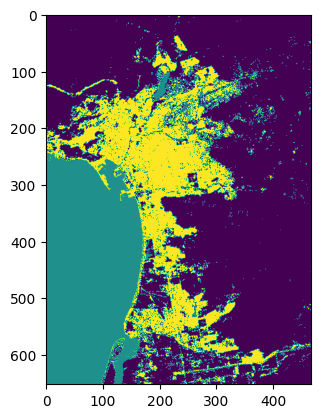

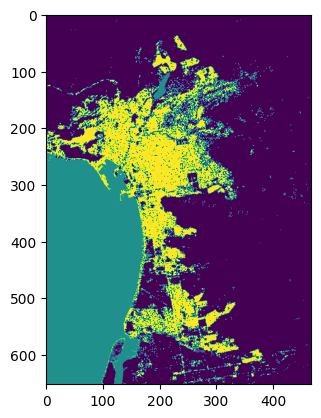

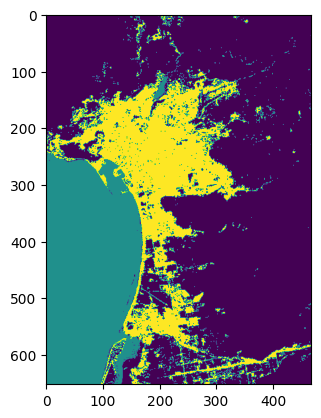

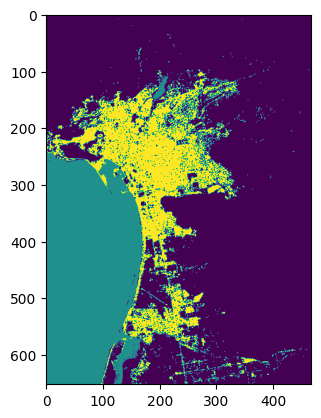

In [9]:
def corrector_2000(a, b):
  if (a == 2 and b == 0):
    return 0
  else:
    return a

def corrector_2010(a, b):
  if (a == 2 and b == 0):
    return 0
  else:
    return a

def corrector(before, after, correction_fun):
  #print('Raster antes: ', before.shape)
  #print('Raster despues: ', after.shape)
  rows = before.shape[0]
  cols = before.shape[1]
  new_before = np.empty((rows,cols))
  for x in range(0, rows):
    for y in range(0, cols):
        new_before[x,y] = correction_fun(before[x,y], after[x,y])
  return(new_before)

prediction_2010_corrected = corrector(prediction_2010_n, prediction_2020_n, corrector_2010)
prediction_2000_corrected = corrector(prediction_2000_n, prediction_2020_n, corrector_2000)

B_img_pred_2010 = (prediction_2010_n).astype('int')
plt.imshow(B_img_pred_2010[:,:])
plt.show()

B_img_pred_c2_2010 = (prediction_2010_corrected).astype('int')
plt.imshow(B_img_pred_c2_2010[:,:])
plt.show()

B_img_pred_2000 = (prediction_2000_n).astype('int')
plt.imshow(B_img_pred_2000[:,:])
plt.show()

B_img_pred_c2_2000 = (prediction_2000_corrected).astype('int')
plt.imshow(B_img_pred_c2_2000[:,:])
plt.show()

In [10]:
write_geotiff(prediction_2010_corrected, filename='/content/drive/MyDrive/Colab Data/ESE_2010_prediction_corregido.tif', proj=sr.ExportToWkt(), transform=geotrans)
write_geotiff(prediction_2000_corrected, filename='/content/drive/MyDrive/Colab Data/ESE_2000_prediction_corregido.tif', proj=sr.ExportToWkt(), transform=geotrans)